In [3]:
!pip install pyforest

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15928 sha256=4f6a453d8348142d82786518f3473d1c5c3443c9f183eeb33bd7d3a35e053ca2
  Stored in directory: c:\users\mustafa\appdata\local\pip\cache\wheels\50\94\94\c8224da834a4db55f67c86feb7c742111ff051d5f3e17127d8
Successfully built pyforest


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full content of each column
pd.set_option('display.width', 2000)

In [113]:
data = pd.read_csv('1. Weather Data.csv')
data.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [11]:
#Number of records and features
data.shape

(8784, 8)

In [13]:
#Number of records
records = len(data)
print(f'Number of records: {records}')

Number of records: 8784


In [15]:
#Number of features or columns
columns = data.shape[1]
print(f"Number of Featueres/Colummns: {columns}")

Number of Featueres/Colummns: 8


In [17]:
# Data types
print(data.dtypes)

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


In [22]:
#Null values
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [33]:
#Duplicate records
duplicate = data.duplicated().sum()
duplicate

0

In [34]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


There are no any significant outliers in the data 


 
 
 
 Visualizations to show the distribution of key weather parameters

In [82]:
#Extract month from 'Date/Time' column
data['date'] = pd.to_datetime(data['Date/Time']) #Convert date column to datetime format
data['month'] = data['date'].dt.month
#Avarage weather parameters per month
monthly = data.groupby('month')[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa']].mean().reset_index()
print(f"Avarage weather conditions per month \n {monthly}")

Avarage weather conditions per month 
     month     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h   Press_kPa
0       1  -7.371505        -12.294758  68.383065        18.108871  101.005349
1       2  -4.225000         -9.221695  68.956897        14.837644  101.142414
2       3   3.121237         -3.488575  64.862903        14.514785  101.335255
3       4   7.009306         -1.934583  56.150000        17.369444  100.716833
4       5  16.237769          8.080780  61.760753        12.846774  101.057164
5       6  20.134028         11.738056  60.643056        14.681944  100.784222
6       7  22.790054         14.595430  62.017473        11.887097  100.828333
7       8  22.279301         15.644758  67.943548        13.931452  100.927097
8       9  16.484444         10.757917  71.165278        14.108333  101.087903
9      10  10.954973          6.533468  75.731183        15.475806  100.909368
10     11   0.931389         -4.179306  69.984722        13.973611  101.658306
11     12  -3

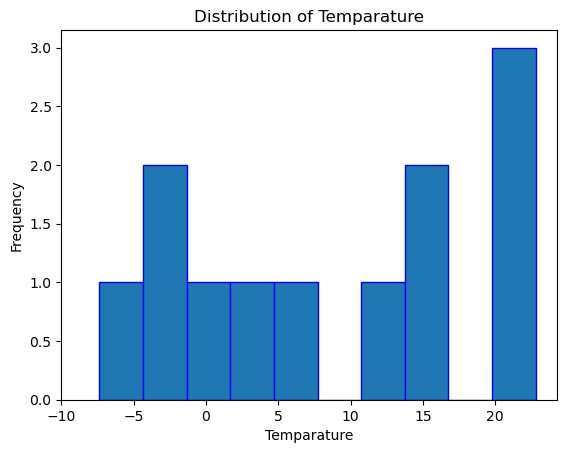

In [98]:
# Visualization to show distribution of temparature
plt.hist(monthly_temps['Temp_C'], bins=10, edgecolor='b')
plt.title('Distribution of Temparature')
plt.xlabel('Temparature')
plt.ylabel('Frequency')
plt.xlim(-10)
plt.show()

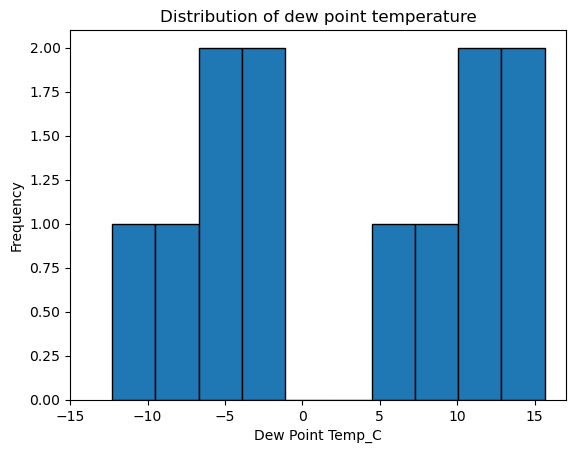

In [85]:
#Visualization to show the distribution of dew point temparature
plt.hist(monthly['Dew Point Temp_C'], bins=10, edgecolor='black')
plt.title('Distribution of dew point temperature')
plt.xlabel('Dew Point Temp_C')
plt.ylabel('Frequency')
plt.xlim(-15)
plt.show()

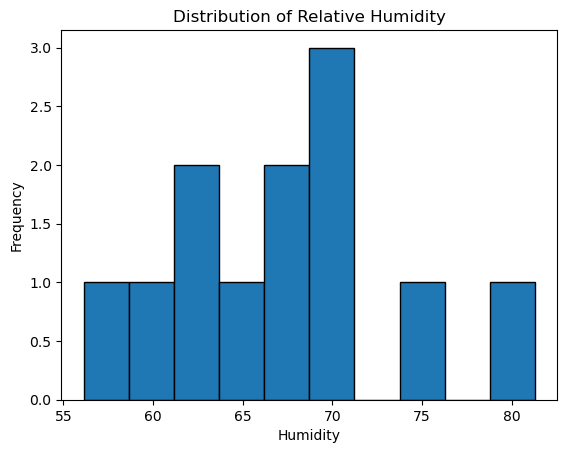

In [87]:
#Visualization to show the distribution of Relative Humidity
plt.hist(monthly['Rel Hum_%'], bins=10, edgecolor='black')
plt.title('Distribution of Relative Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

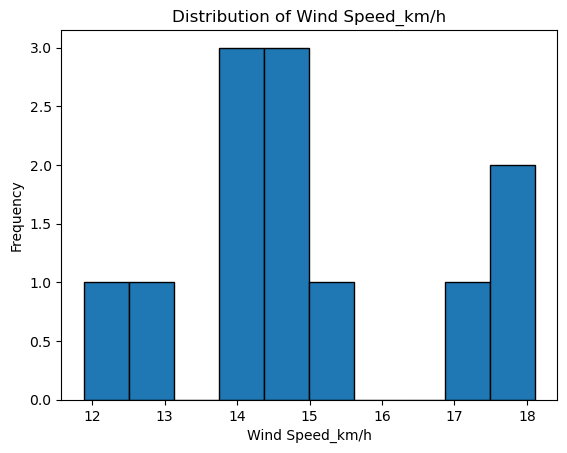

In [90]:
#Visualization to show the distribution of wind speed
plt.hist(monthly['Wind Speed_km/h'], bins=10, edgecolor='black')
plt.title('Distribution of Wind Speed_km/h')
plt.xlabel('Wind Speed_km/h')
plt.ylabel('Frequency')
plt.show()

Time Series Graphs to visualize trends over time

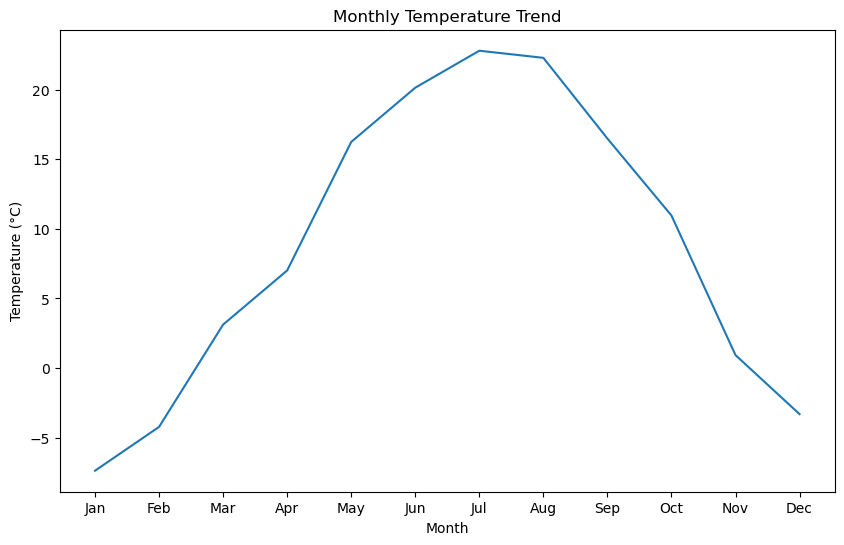

In [111]:
# Visualize temperature over time(monthly)
plt.figure(figsize=(10, 6))
plt.plot(monthly['month'], monthly['Temp_C'])
plt.xlabel('Month')
plt.xticks(monthly['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Trend')
plt.show()

There are low temperature at the beginning of the year.

The temperature increases upto july where it reaches it maximum.

It then starts decreasing up to the end of the year.


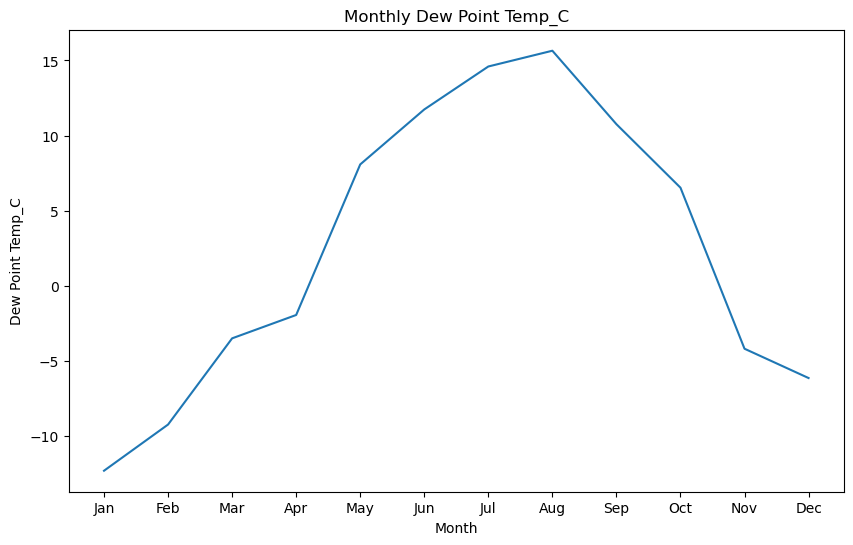

In [119]:
# Visualize Dew Point Temp_C over time(monthly)
plt.figure(figsize=(10, 6))
plt.plot(monthly['month'], monthly['Dew Point Temp_C'])
plt.xlabel('Month')
plt.xticks(monthly['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Dew Point Temp_C')
plt.title('Monthly Dew Point Temp_C')
plt.show()

The dew point temperature is low at the begning if the year.

It keeps increasing upto august where it reaches it max and then starts to decrease upto to the end of the year.

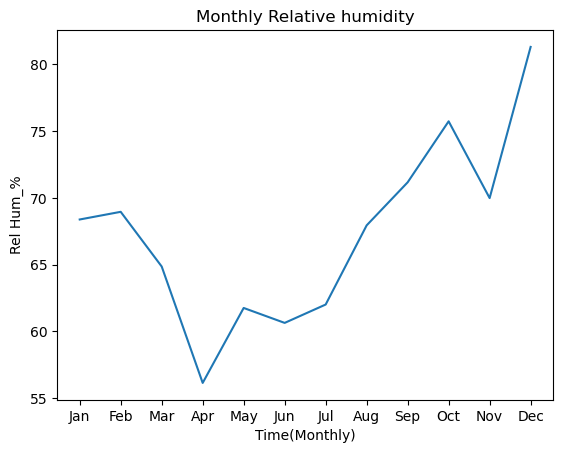

In [114]:
#Visualize humidity over time
plt.plot(monthly['month'], monthly['Rel Hum_%'])
plt.title('Monthly Relative humidity')
plt.xticks(monthly['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Time(Monthly)')
plt.ylabel('Rel Hum_%')
plt.show()

The Relative humidity was high at the beginning of the year.

It reduces upto the month of april where it starts to rise again although the trajectory is not consinstent. 


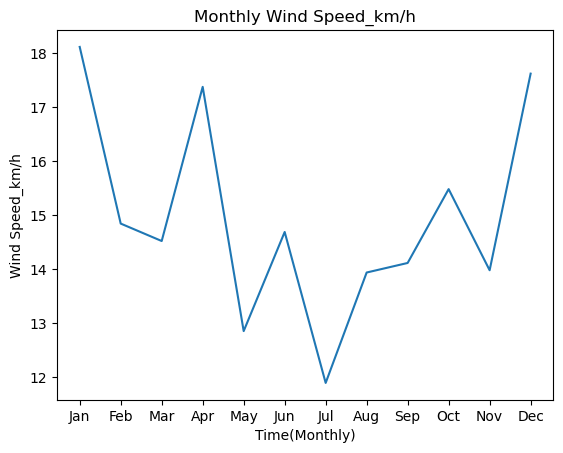

In [115]:
#Visualize monthly Wind Speed_km/h
plt.plot(monthly['month'], monthly['Wind Speed_km/h'])
plt.title('Monthly Wind Speed_km/h')
plt.xticks(monthly['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Time(Monthly)')
plt.ylabel('Wind Speed_km/h')
plt.show()

The wind speed is incosistent during the year

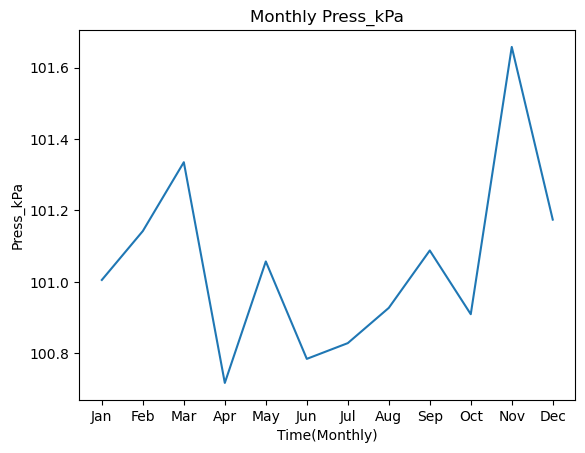

In [116]:
#Visualize monthly Press_kPa
plt.plot(monthly['month'], monthly['Press_kPa'])
plt.title('Monthly Press_kPa')
plt.xticks(monthly['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Time(Monthly)')
plt.ylabel('Press_kPa')
plt.show()

In [117]:
numeric_data = monthly.select_dtypes(include='number')
corr_matrix = numeric_data.corr()
print(corr_matrix)

                     month    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Press_kPa
month             1.000000  0.248306          0.351300   0.587460        -0.147696   0.243781
Temp_C            0.248306  1.000000          0.988740  -0.398669        -0.687100  -0.499035
Dew Point Temp_C  0.351300  0.988740          1.000000  -0.258194        -0.680464  -0.456052
Rel Hum_%         0.587460 -0.398669         -0.258194   1.000000         0.290417   0.418108
Wind Speed_km/h  -0.147696 -0.687100         -0.680464   0.290417         1.000000  -0.108059
Press_kPa         0.243781 -0.499035         -0.456052   0.418108        -0.108059   1.000000


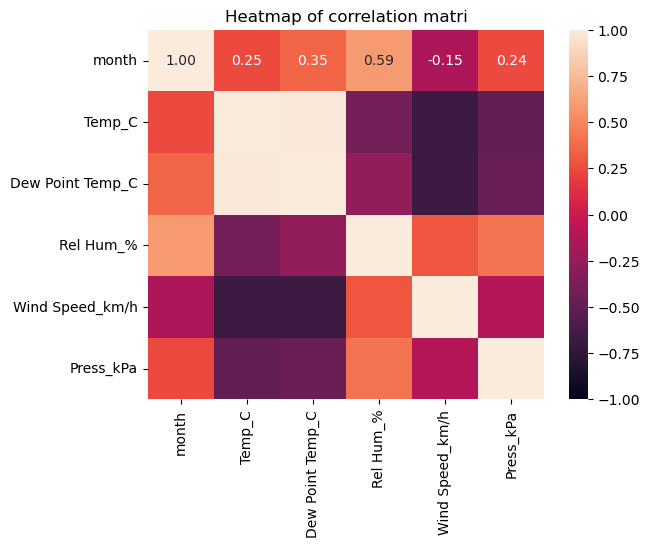

In [118]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of correlation matri')
plt.show()

Tempereture and dew point temperature are highly positive correlated. 

Temperature and wind speed seems to negatively corelated.

Weather Patterns and trends:

At the times when Temperature is low, during the start and the end of the year, Relative Humidity is high and vice versa.

An increase in temperature may mean an increase in the dew point temperature too.

Anomalities:
There is certain drop in relative humidity in the month of october.

Cnclusions:

Temperatures are below freezing points from the month of January to April.

Humidity levels are higher during the colder months.    

Insights gained from EDA can be used in:

Agriculture: Farmers can use insight about temperature to plan on when to plant and harvest.

    

Areas for further Analysis:

Analyzing weather data over many years to provide a well understanding of the trends and patterns.

Analyzing the impact of the different weather conditions.

Develop a predictive model to predict the future weather conditions.